In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

train_df['train_test'] = 1
test_df['train_test'] = 0
test_df['survived'] = np.NaN
all_data = pd.concat([train_df, test_df])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test',
       'survived'],
      dtype='object')

In [3]:
#looking our data types and null counts
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [4]:
#describeing the given data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [6]:
#numeric and categorical values
num_df = train_df[['Age','SibSp','Parch','Fare']]
cat_df = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


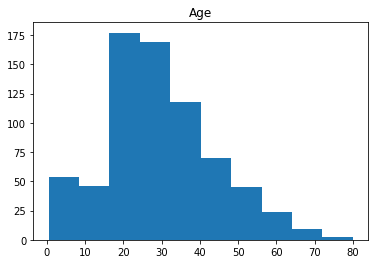

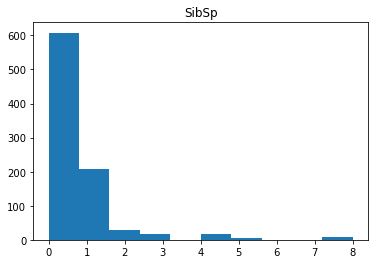

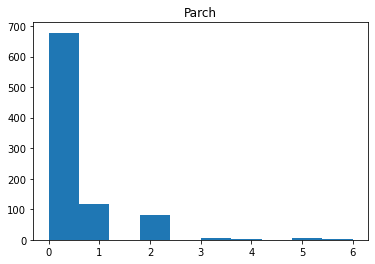

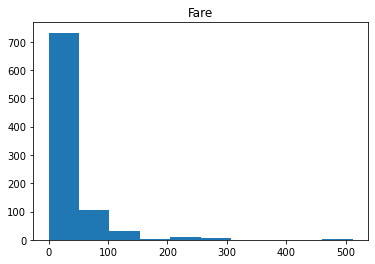

In [7]:
#distributions for all numeric values
for i in num_df.columns:
    plt.hist(num_df[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


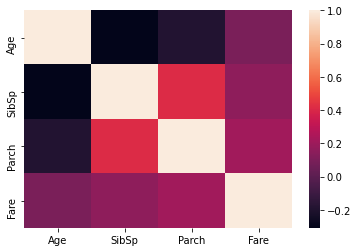

In [8]:
print(num_df.corr())
sns.heatmap(num_df.corr())

In [9]:
#comparing survival rate across Age, SibSp, Parch and Fare
pd.pivot_table(train_df , index = 'Survived',values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


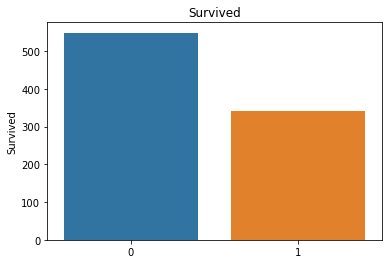

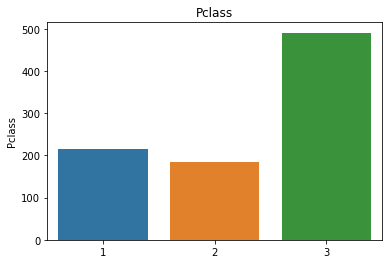

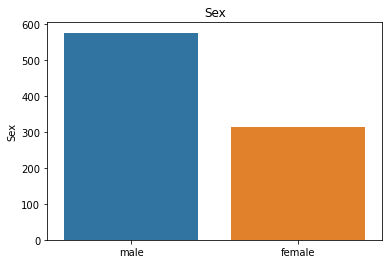

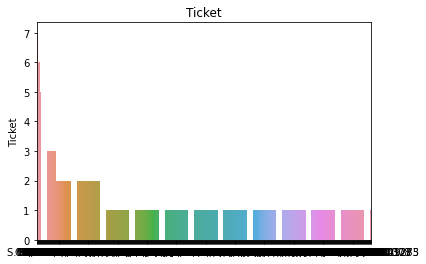

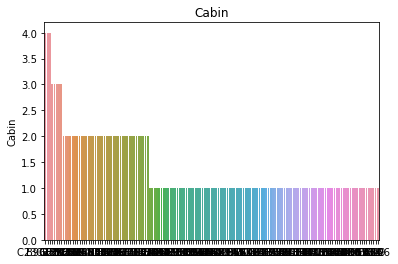

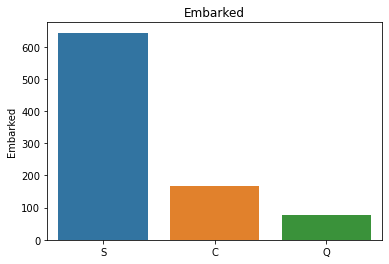

In [10]:
for i in cat_df.columns:
    sns.barplot(cat_df[i].value_counts().index,cat_df[i].value_counts()).set_title(i)
    plt.show()

In [11]:
#comparing survival and each of these categorical variables
print(pd.pivot_table(train_df ,index = 'Survived',columns = 'Pclass',values =  'Ticket',aggfunc = 'count'))
print()
print(pd.pivot_table(train_df , index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_df , index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [12]:
cat_df.Cabin
train_df['cabin_multiple'] = train_df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train_df['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [13]:
pd.pivot_table(train_df,index = 'Survived',columns = 'cabin_multiple',values = 'Ticket',aggfunc = 'count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [14]:
cat_df.Cabin
train_df['cabin_multiple'] = train_df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train_df['cabin_multiple'].value_counts()

pd.pivot_table(train_df, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')


train_df['cabin_adv'] = train_df.Cabin.apply(lambda x: str(x)[0])

print(train_df.cabin_adv.value_counts())
pd.pivot_table(train_df ,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [15]:
train_df['numeric_ticket'] = train_df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train_df['ticket_letters'] = train_df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
train_df['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [16]:
#lets us view all rows in dataframe through scrolling. This is for convenience 
pd.set_option("max_rows", None)
train_df['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
pp             3
wep            3
sopp           3
scah           2
swpp           2
ppp            2
sotono2        2
fa             1
fc             1
casoton        1
sp             1
sc             1
scahbasle      1
scow           1
sop            1
sca4           1
as             1
Name: ticket_letters, dtype: int64

In [17]:
#difference in numeric and non-numeric tickets in survival rate
pd.pivot_table(train_df, index = 'Survived',columns = 'numeric_ticket',values = 'Ticket',aggfunc='count')


numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [18]:
#survival rate across different tyicket types 
pd.pivot_table(train_df,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [19]:
train_df.Name.head(50)
train_df['name_title'] = train_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
train_df['name_title'].value_counts() 

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Sir               1
Don               1
Capt              1
Lady              1
Jonkheer          1
Ms                1
the Countess      1
Mme               1
Name: name_title, dtype: int64